

First we import the necessary packages


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import folium.plugins
from folium.plugins import HeatMap

from bokeh.io import output_notebook
output_notebook()

from bokeh.models import Legend
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.palettes import Category20

Loading BokehJS ...

Next we mount our google drive where we have uploaded the data.

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

From here we can load the data using pandas.

In [8]:
#data = pd.read_csv("/content/drive/MyDrive/US_Accidents_Dec20.csv")
data = pd.read_csv("data/CleanedData.csv")

A view of the data:

In [6]:
data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


To get a feeling of the data, we will use a bar chart to show the distribution of incidents across the different states in the US

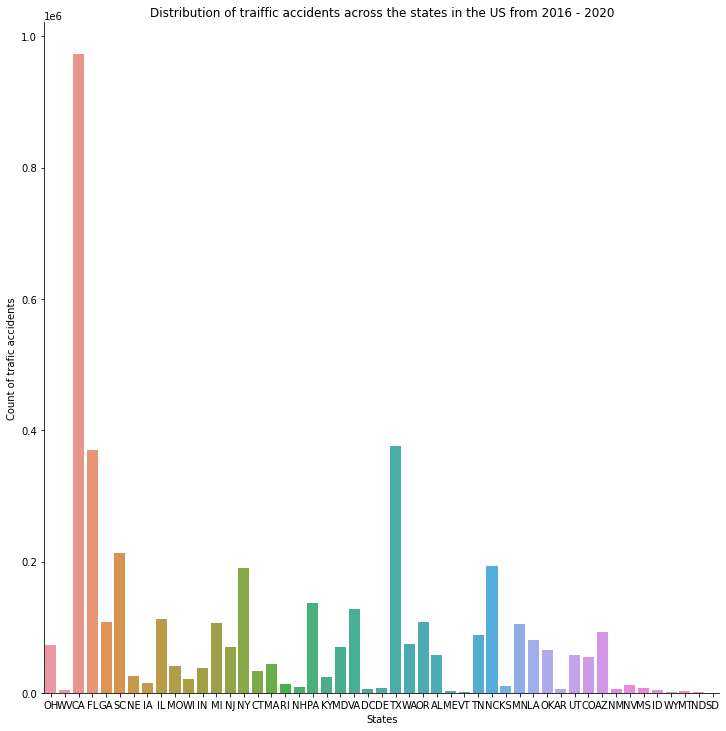

In [ ]:
ax = sns.catplot(x='State', data = data, kind='count',height=10)
ax.set(xlabel="States",ylabel="Count of trafic accidents",title="Distribution of traiffic accidents across the states in the US from 2016 - 2020")
plt.show()

What we see is that there have been by far the most accidents in california in the period 2016-2020

In [4]:
data = data[data['Start_Lat'] != 'NaN']
data_subset = data.sample(frac=0.01)


Next we would like to show the traffic accidents on a map:

In [ ]:
map = folium.Map(location=[40, -100],
                    zoom_start = 5)
values = data[['Start_Lat','Start_Lng']].values

HeatMap(values).add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
folium.LayerControl().add_to(map)


#for i in range(len(data_subset)):
#  folium.Circle(radius=25, location=[data_subset['Start_Lat'].iloc[i],data_subset['Start_Lng'].iloc[i]], popup=data_subset['Description'].iloc[i], color = "crimson", fill=False).add_to(map_cluster)

map

Forsøg på at lavet et plot der kan filtrere ift. severity, men som du kan se så kører det ikke:

In [15]:
GroupedData = data.groupby(['State','Severity']).count()
GroupedData = GroupedData.iloc[:,0].reset_index(name='Count')
GroupedData = GroupedData.pivot(index='State', columns='Severity',values='Count')
GroupedData  = GroupedData.rename(columns = {1: 'Severity 1', 2: 'Severity 2', 3: 'Severity 3', 4: 'Severity 4'}, inplace = False)
#GroupedData = GroupedData[GroupedData['Severity 1'] != 'NaN']
GroupedData = GroupedData.reset_index('State')
#GroupedData.reset_index(drop=True, inplace=True)
#TestSet = GroupedData['State','Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
#GroupedData.drop(['Severity'], axis = 1)
print(GroupedData.head())

Severity State  Severity 1  Severity 2  Severity 3  Severity 4
0           AL         NaN       457.0       150.0         1.0
1           AR         NaN        52.0         6.0         5.0
2           AZ        79.0       646.0       160.0        34.0
3           CA        43.0      7173.0      2268.0        96.0
4           CO         6.0       257.0       210.0        43.0


In [ ]:
src = ColumnDataSource(data)

In [16]:
states = [str(x) for x in GroupedData['State']]

p = figure(title="Severity for crimes at location", x_range = states, y_range=(0,1000000), plot_height=400, plot_width=850,  x_axis_label= 'State',  y_axis_label='Frequency', toolbar_location=None, tools="")

bar = {}
items = []
SeverityList = ('Severity 1', 'Severity 2', 'Severity 3', 'Severity 4')
for indx, i in enumerate(SeverityList):
  bar[i] = p.vbar(x='State',  top=i, source= src, color=Category20[14][13-indx], width=0.5, muted_alpha=0.2)
  items.append((i, [bar[i]]))
  print(items)

legend = Legend(items=items)


p.add_layout(legend, 'left')
p.legend.click_policy="mute"

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48']
[('Severity 1', [GlyphRenderer(id='1028', ...)])]
[('Severity 1', [GlyphRenderer(id='1028', ...)]), ('Severity 2', [GlyphRenderer(id='1034', ...)])]
[('Severity 1', [GlyphRenderer(id='1028', ...)]), ('Severity 2', [GlyphRenderer(id='1034', ...)]), ('Severity 3', [GlyphRenderer(id='1040', ...)])]
[('Severity 1', [GlyphRenderer(id='1028', ...)]), ('Severity 2', [GlyphRenderer(id='1034', ...)]), ('Severity 3', [GlyphRenderer(id='1040', ...)]), ('Severity 4', [GlyphRenderer(id='1046', ...)])]


In [17]:
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Severity 1" (closest match: "Severity") [renderer: GlyphRenderer(id='1028', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Severity 2" (closest match: "Severity") [renderer: GlyphRenderer(id='1034', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Severity 3" (closest match: "Severity") [renderer: GlyphRenderer(id='1040', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This cou

In [ ]:
Jeg har lavet et plot af hyppighed af ulykker i hver stat pr. 10000 indbyggere

In [ ]:
#Plot hyppighed pr. inbygger:
GroupedDataHyp = data.groupby(['State']).count()
temp = []
population = {'AL': 4903185, 'AR': 3017825, 'AZ': 7278717, 'CA': 39512223, 'CO': 5758736, 'CT':3565287, 'DC': 705749, 'DE': 973764, 'FL': 21477737, 'GA': 10617423, 'IA': 3155070, 'ID': 1787065, 'IL': 12671821, 'IN': 6732219, 'KS': 2913314, 'KY': 4467673, 'LA': 4648794, 'MA': 6949503, 'MD': 6045680, 'ME': 1344212, 'MI': 9986857, 'MN': 5639632, 'MO': 6137428, 'MS': 2976149, 'MT': 1059778, 'NC': 10488084, 'ND': 762062, 'NE': 1934408, 'NH': 1359711, 'NJ': 8882190, 'NM': 2096829, 'NV': 3080156, 'NY': 19453561, 'OH': 11789100, 'OK': 3956971, 'OR': 4217737, 'PA': 12801989, 'RI': 1059361, 'SC': 5148714, 'SD': 884659, 'TN': 6833174, 'TX': 28995881, 'UT': 3205958, 'VA': 8535519, 'VT': 623989, 'WA': 7614893, 'WI': 5822434, 'WV': 1792147, 'WY': 578759}
GroupedDataHyp = GroupedDataHyp.iloc[:,0].reset_index(name='Count')
for i in range(len(GroupedDataHyp)):
  temp.append(population[GroupedDataHyp['State'].iloc[i]])
GroupedDataHyp['population'] = temp
GroupedDataHyp['normalized'] = GroupedDataHyp['Count'].div(GroupedDataHyp['population']*0.0001)
#normalize = GroupedData.groupby('State')['Count'].transform('sum')
#GroupedData['Count_norm'] = GroupedData['Count'].div(normalize)
print(GroupedDataHyp.head())


In [ ]:
ax = GroupedDataHyp.plot.bar(x ='State',y='normalized', rot=0, figsize = [15, 10])

   Severity   Count
0         1     419
1         2  861746
2         3  391354
3         4    7821


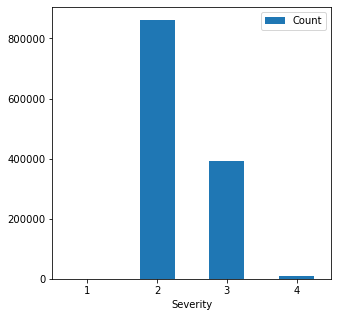

In [18]:
### Vil lave et plot hvor man kan ændre i vejr data og så få fordelingen af de forskellige severities:
GroupedDataServerity = data.groupby(['Severity']).count()
GroupedDataServerity = GroupedDataServerity.iloc[:,0].reset_index(name='Count')
#GroupedDataServerity = GroupedData.pivot(index='State', columns='Severity',values='Count')

ax = GroupedDataServerity.plot.bar(x ='Severity',y='Count', rot=0, figsize = [5,5])
print(GroupedDataServerity)